In [1]:
library(gap)
library(dplyr)
library(ggplot2)
library(calibrate)
library(VennDiagram)
library(UpSetR)

Warning message:
“package ‘gap’ was built under R version 3.6.2”
gap version 1.2.3-1

Warning message:
“package ‘dplyr’ was built under R version 3.6.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘calibrate’ was built under R version 3.6.2”
Loading required package: MASS

Warning message:
“package ‘MASS’ was built under R version 3.6.2”

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Warning message:
“package ‘VennDiagram’ was built under R version 3.6.2”
Loading required package: grid

Loading required package: futile.logger



In [4]:
data=read.delim("data/fig1_DEresults.txt", row.names=1)

In [5]:
#select top 10 genes
top10m=data %>% top_n(-10,male.padj)
top10m
top10f=data %>% top_n(-10,female.padj)
top10f

,estimate,SE,df,t.ratio,pval,padj,male.estimate,male.SE,male.pval,male.padj,⋯,gene,Chr,log2FC,FC,log2FC.males,FC.males,log2FC.females,FC.females,P_start,P_end
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
ILMN_1772131,-1.4330758,0.05091632,289.8748,-28.14571,6.726057e-85,8.345692e-81,-1.3678242,0.05900267,6.851446e-119,8.212828e-115,⋯,IL1R2,2,1.4386789,2.710725,1.3736519,2.591257,1.575725,2.980852,102644699,102644748
ILMN_1772387,-1.1509813,0.04075498,289.6147,-28.24149,3.526842e-85,4.376810e-81,-1.0577491,0.04601045,5.960855e-117,7.144085e-113,⋯,TLR2,4,1.1473416,2.215054,1.0563516,2.079666,1.339106,2.529944,154627084,154627133
ILMN_1778444,-1.6512487,0.04998042,289.6057,-33.03791,3.048467e-100,3.785586e-96,-1.5983858,0.06010169,7.819572e-156,9.378795e-152,⋯,FKBP5,6,1.6546524,3.148473,1.5990506,3.029439,1.771835,3.414880,35541657,35541706
ILMN_1781468,-0.9232449,0.03280336,289.7209,-28.14483,7.084310e-85,8.789504e-81,-0.8822461,0.03809448,1.168280e-118,1.400301e-114,⋯,SMAP2,1,0.9258766,1.899838,0.8839695,1.845446,1.014197,2.019778,40888366,40888415
ILMN_1795298,-1.3003595,0.04598382,289.9010,-28.27863,2.449385e-85,3.039931e-81,-1.2487987,0.05328030,1.740744e-121,2.086803e-117,⋯,GPER,7,1.3033574,2.468026,1.2532980,2.383858,1.408859,2.655270,1133223,1133273
ILMN_1808047,-1.0717100,0.03750584,290.0605,-28.57449,2.526935e-86,3.136684e-82,-1.0173467,0.04304525,1.709737e-123,2.049803e-119,⋯,PHC2,1,1.0753460,2.107227,1.0208880,2.029168,1.190118,2.281714,33789972,33790021
ILMN_2072178,-1.7150931,0.05848903,289.6057,-29.32333,1.100210e-88,1.365801e-84,-1.6119171,0.06656132,1.472275e-129,1.765257e-125,⋯,ECHDC3,10,1.7159322,3.285088,1.6124067,3.057615,1.934115,3.821436,11805840,11805889
ILMN_2083469,-1.3066829,0.04438968,289.8364,-29.43663,4.425252e-89,5.493950e-85,-1.2381779,0.05088984,9.314350e-131,1.116977e-126,⋯,IRS2,13,1.3080979,2.476149,1.2365207,2.356296,1.458949,2.749080,110406764,110406813
ILMN_2305407,-1.4517141,0.04897793,289.6057,-29.64017,1.062750e-89,1.319617e-85,-1.4320617,0.05909584,1.002280e-129,1.201834e-125,⋯,ZBTB16,11,1.4543880,2.740403,1.4327133,2.699539,1.500068,2.828560,114121203,114121252


,estimate,SE,df,t.ratio,pval,padj,male.estimate,male.SE,male.pval,male.padj,⋯,gene,Chr,log2FC,FC,log2FC.males,FC.males,log2FC.females,FC.females,P_start,P_end
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
ILMN_1667371,-0.7098316,0.02662092,289.8179,-26.66442,5.628001e-80,6.977596e-76,-0.6597577,0.03169065,2.931064e-96,3.508484e-92,⋯,SLA,8,0.7043379,1.629397,0.6539281,1.573447,0.8105777,1.753914,134049205,134049254
ILMN_1700896,-1.0816326,0.04128369,289.6057,-26.20000,2.184527e-78,2.707285e-74,-0.9969724,0.05188975,2.865626e-82,3.423850e-78,⋯,SAP30,4,1.0760652,2.108278,0.9919017,1.988805,1.2534421,2.384096,174298444,174298493
ILMN_1772387,-1.1509813,0.04075498,289.6147,-28.24149,3.526842e-85,4.376810e-81,-1.0577491,0.04601045,5.960855e-117,7.144085e-113,⋯,TLR2,4,1.1473416,2.215054,1.0563516,2.079666,1.3391056,2.529944,154627084,154627133
ILMN_1778444,-1.6512487,0.04998042,289.6057,-33.03791,3.048467e-100,3.785586e-96,-1.5983858,0.06010169,7.819572e-156,9.378795e-152,⋯,FKBP5,6,1.6546524,3.148473,1.5990506,3.029439,1.7718349,3.414880,35541657,35541706
ILMN_1781468,-0.9232449,0.03280336,289.7209,-28.14483,7.084310e-85,8.789504e-81,-0.8822461,0.03809448,1.168280e-118,1.400301e-114,⋯,SMAP2,1,0.9258766,1.899838,0.8839695,1.845446,1.0141970,2.019778,40888366,40888415
ILMN_1781700,-1.0014558,0.04161714,289.6057,-24.06354,4.795828e-71,5.930042e-67,-0.9079105,0.05125766,3.347440e-70,3.991153e-66,⋯,IL18R1,2,0.9939422,1.991620,0.8996535,1.865618,1.1926582,2.285735,103014763,103014812
ILMN_1804396,-0.5433052,0.02232714,291.9976,-24.33384,3.232541e-72,3.998977e-68,-0.4827313,0.02724594,3.069863e-70,3.660505e-66,⋯,IRF2BPL,14,0.5437269,1.457733,0.4821181,1.396793,0.6735693,1.595014,77491396,77491445
ILMN_1808047,-1.0717100,0.03750584,290.0605,-28.57449,2.526935e-86,3.136684e-82,-1.0173467,0.04304525,1.709737e-123,2.049803e-119,⋯,PHC2,1,1.0753460,2.107227,1.0208880,2.029168,1.1901177,2.281714,33789972,33790021
ILMN_2081682,-0.7663249,0.02731231,289.8728,-28.05785,1.306999e-84,1.621463e-80,-0.7157529,0.03158517,1.085835e-113,1.301157e-109,⋯,SMAP2,1,0.7735139,1.709428,0.7228639,1.650455,0.8802600,1.840707,40888826,40888875


## Panel A - Upset plot displaying the overlapping significant transcripts identified in combined and sex-stratified GR-DEA. The majority of transcripts were found in both the combined and stratified analyses independently. 

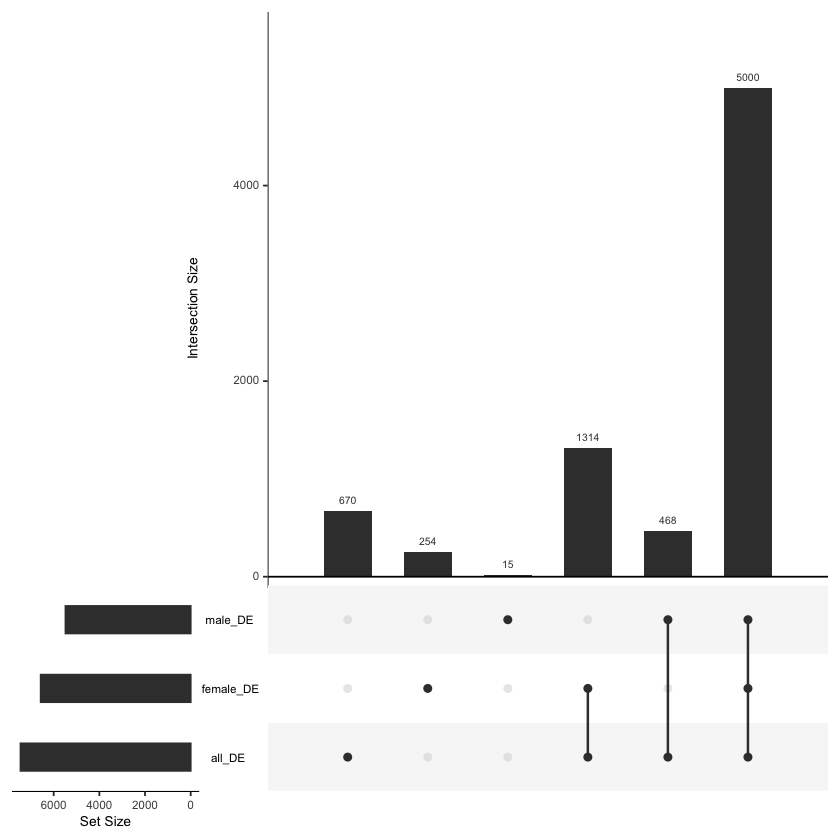

In [6]:
listInput <- list(male_DE = rownames(data[data$male.padj<.05,]), 
                  female_DE =  rownames(data[data$female.padj<.05,]),
                  all_DE = rownames(data[data$padj<.05,]))

upset(fromList(listInput), nsets = 20)

## Panel B - Miami plot of results across 11,994 autosomal transcripts. Dashed lines indicate significance cut-off at an FDR of 5%. 6,568 GR-DE transcripts were significantly differentially regulated in females (n = 93 individuals; bottom panel) and 5,483 GR-DE transcripts in males (n = 196 individuals; top panel). C) Volcano plot of log2 fold change (x axis) by -log10FDR. Upper panel showing male GR-DE transcripts at an FDR of 0.05 with FCs ranging from 0.68 to 3.06. Lower panel showing female GR-DE transcripts with FCs ranging from 0.62 to 3.82.

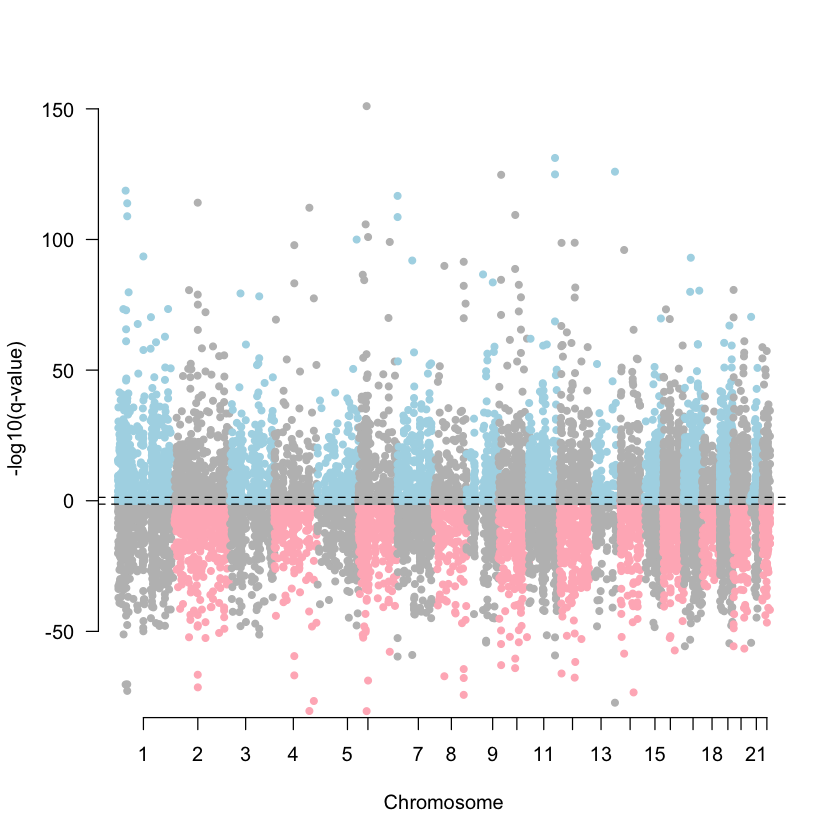

In [7]:
#manhatten plot options 
ops=control=mht.control(cutoffs=c(-log10(0.05)),labels=paste("Chr",1:22,sep=""))

miamiplot(data,chr="Chr",bp="P_start",p="male.padj",pr="female.padj",snp="X",lcols = c(),
          col = c("lightblue", "grey"), col2 = c("grey", "lightpink"),ylab="-log10(q-value)")
abline(h = -log10(0.05),lty = 2, lwd = 1)
abline(h = log10(0.05),lty = 2, lwd = 1)


## Panel C - Volcano plot of log2 fold change (x axis) by -log10FDR. Upper panel showing male GR-DE transcripts at an FDR of 0.05 with FCs ranging from 0.68 to 3.06. Lower panel showing female GR-DE transcripts with FCs ranging from 0.62 to 3.82. 

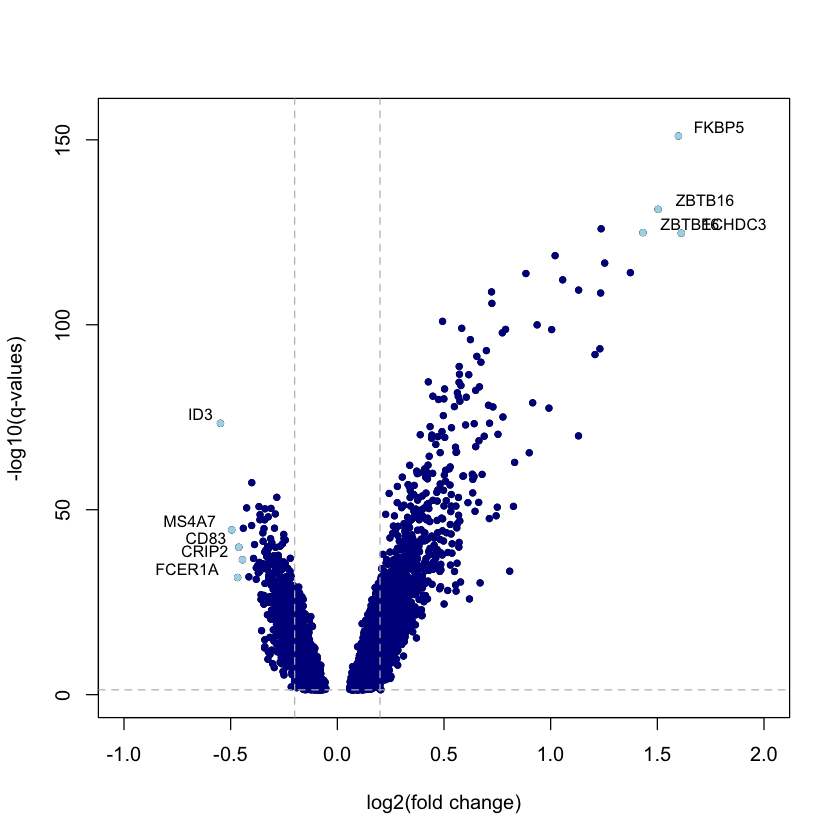

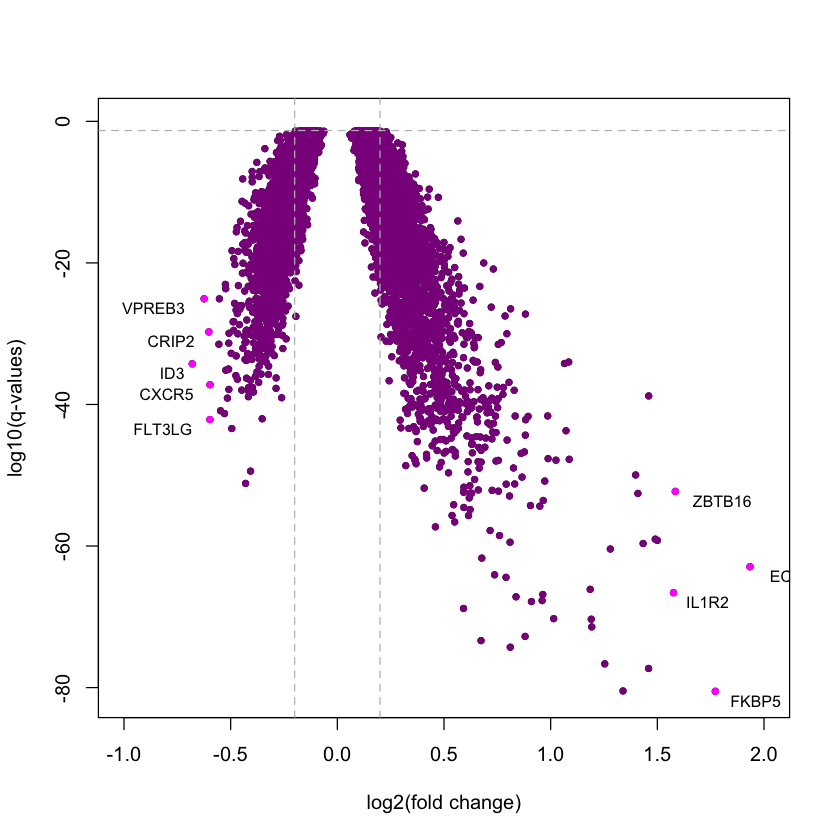

In [8]:
data.sig.male=data[ data$male.padj<=0.05,]
with(data.sig.male, plot(log2FC.males , -log10(male.padj), pch=20, main="",xlim=c(-1,2),ylim=c(0,155), ylab="-log10(q-values)", xlab="log2(fold change)"))
with(subset(data.sig.male, male.padj<0.05), points(log2FC.males , -log10(male.padj), pch=20, col="darkblue"))
with(subset(data.sig.male, male.padj<0.05 & log2FC.males>=1.373652 ), textxy(log2FC.males , -log10(male.padj),labs=gene, cex=.8))
with(subset(data.sig.male, male.padj<0.05 & log2FC.males<= -0.4446073), textxy(log2FC.males , -log10(male.padj), labs=gene, cex=.8))
with(subset(data.sig.male, male.padj<0.05 & log2FC.males>=1.373652 ), points(log2FC.males , -log10(male.padj),col="lightblue", pch=20))
with(subset(data.sig.male, male.padj<0.05 & log2FC.males<= -0.4446073), points(log2FC.males , -log10(male.padj), col="lightblue", pch=20))
abline(h = -log10(0.05), col = "gray", lty = 2, lwd = 1)
abline(v = c(-0.2,0.2), col = "gray", lty = 2, lwd = 1)

data.sig.female=data[ data$female.padj <=0.05,]
with(data.sig.female, plot(log2FC.females , log10(female.padj ), pch=20, main="",xlim=c(-1,2),ylim=c(-81,0),ylab="log10(q-values)", xlab="log2(fold change)"))
with(subset(data.sig.female, female.padj <0.05), points(log2FC.females , log10(female.padj), pch=20, col="darkmagenta"))
with(subset(data.sig.female, female.padj <0.05 & log2FC.females>=1.500068), textxy(log2FC.females , log10(female.padj ),labs=gene, cex=.8))
with(subset(data.sig.female, female.padj <0.05 & log2FC.females<= -0.5968398), textxy(log2FC.females, log10(female.padj ), labs=gene, cex=.8))
with(subset(data.sig.female, female.padj <0.05 & log2FC.females>=1.500068), points(log2FC.females , log10(female.padj ),col="magenta", pch=20))
with(subset(data.sig.female, female.padj <0.05 & log2FC.females<=-0.5968398), points(log2FC.females ,log10(female.padj ), col="magenta", pch=20))
abline(h = log10(0.05), col = "gray", lty = 2, lwd = 1)
abline(v = c(-0.2,0.2), col = "gray", lty = 2, lwd = 1)

## Panel D - Scatterplot showing the difference in gene expression between post dexamethasone and baseline for males (y axis) and females (x axis) colored by identification in combined analysis (n = 5,000 transcripts), females (n=1568), males (n = 483), and neither females or males (n = 4,943). Significant results, whether supported in the combined analysis or limited to sex stratified analyses, are mainly limited to the upper right and lower left quadrants, supporting consistent effect directions between males and females.

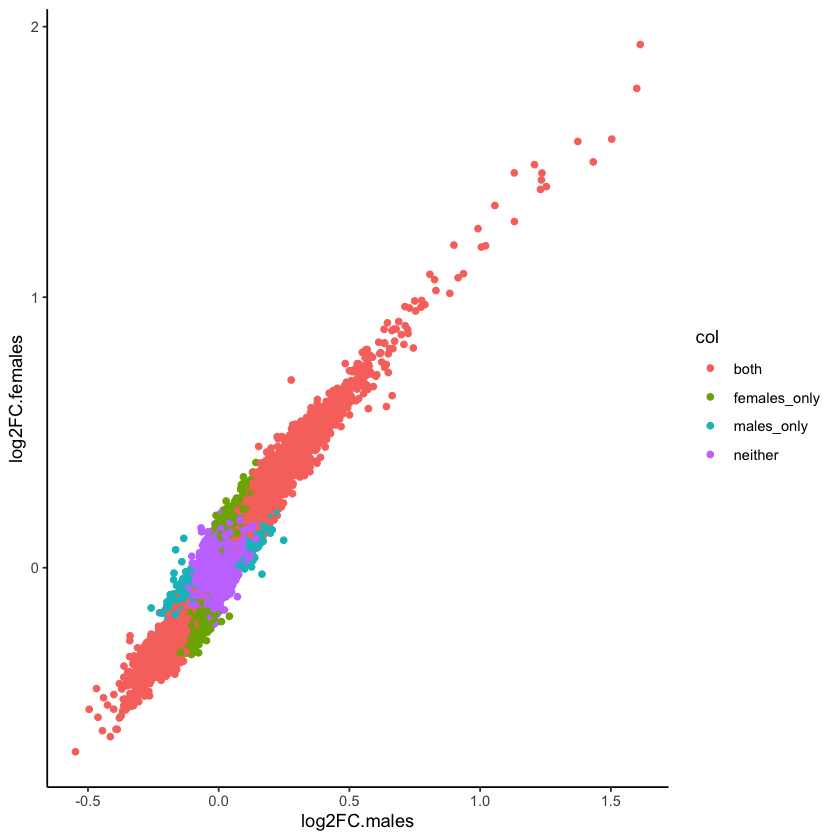

In [11]:
both= data
both$col="neither"
#both[ both$X %in% all_gr$Probe_Id,]$col="general"
male_fe=intersect(row.names(data.sig.female), row.names(data.sig.male))
#length(male_fe)#5000
both[ row.names(both) %in% male_fe,]$col="both"
m_only=setdiff( row.names(data.sig.male), row.names(data.sig.female)) 
#length(m_only)#483
both[ row.names(both) %in% m_only,]$col="males_only"
fe_only=setdiff(row.names(data.sig.female), row.names(data.sig.male)) 
#length(fe_only)#1568
both[ row.names(both) %in% fe_only,]$col="females_only"

ggplot(data = both, aes(x = log2FC.males, y = log2FC.females, colour = col)) +geom_point()+ theme_classic()
